# Preparing The Data

In [1]:
#import pandas to read the data ans store it in a dataframe
import pandas as pd

In [2]:
#load the dataset
global_air_pollution = pd.read_csv('C:\\Users\\Admin\\Desktop\\global air pollution dataset.csv')

In [3]:
#get the shape of data
global_air_pollution.shape

(23463, 12)

This means that the data containes 23463 sample with 12 feature

In [6]:
#getting some information about data (column names and their data types)
global_air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [7]:
# show the nulls in each column
global_air_pollution.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

we have 427 null data in the feature country and 1 in city
here the null data will not affect the model results since these 2 columns will not be a features in the model

In [8]:
#show a sample of the data
global_air_pollution.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


# Some data visulization

In [9]:
# import matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

1. Get the number of cities in each AQI category

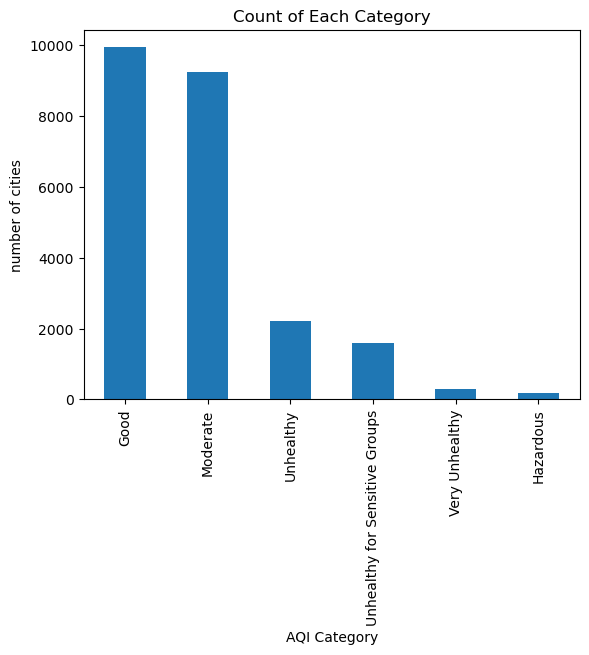

In [10]:
AQI_category_counts=global_air_pollution['AQI Category'].value_counts()
AQI_category_counts.plot(kind='bar')
plt.xlabel('AQI Category')
plt.ylabel('number of cities')
plt.title('Count of Each Category')
plt.show()

2. persantages of each category in the dataset

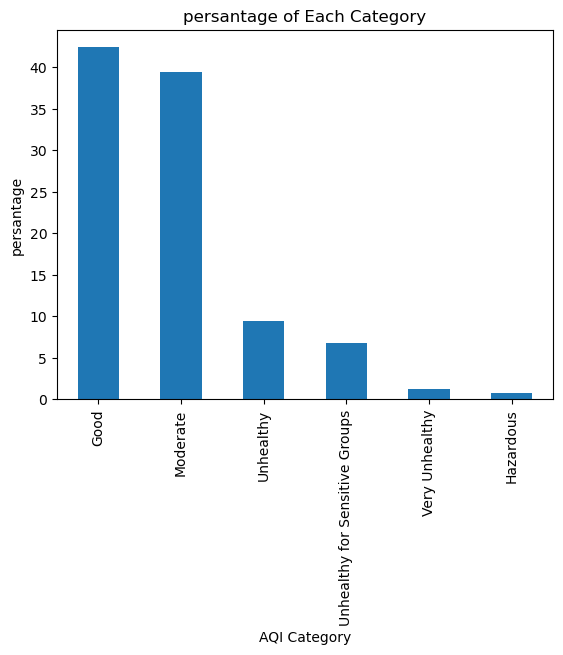

In [11]:
AQI_category_counts_percantage = (AQI_category_counts/23463)*100
AQI_category_counts_percantage.plot(kind='bar')
plt.xlabel('AQI Category')
plt.ylabel('persantage')
plt.title('persantage of Each Category')
plt.show()

3. getting the hights 15 country according to the number of cities

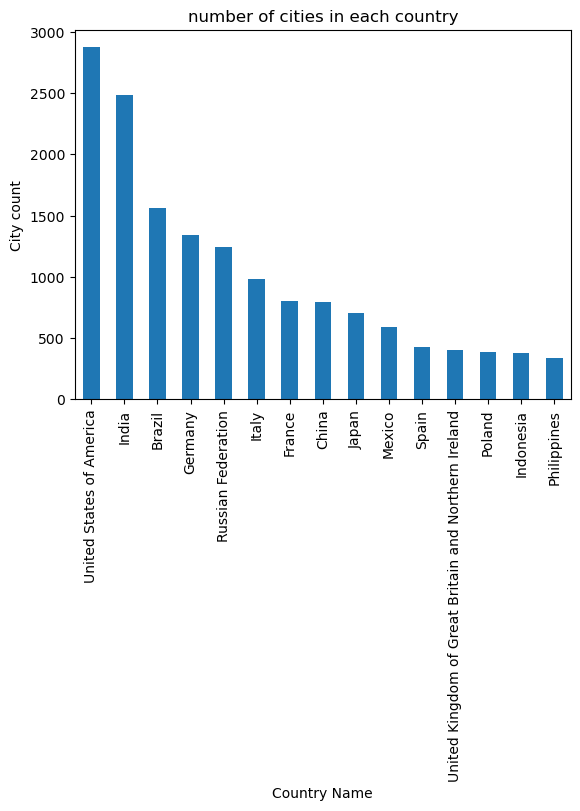

In [12]:
city_count = global_air_pollution['Country'].value_counts().head(15)
city_count.plot(kind='bar')
plt.xlabel('Country Name')
plt.ylabel('City count')
plt.title('number of cities in each country')
plt.show()

4. get the number of good cities in the top 15 country

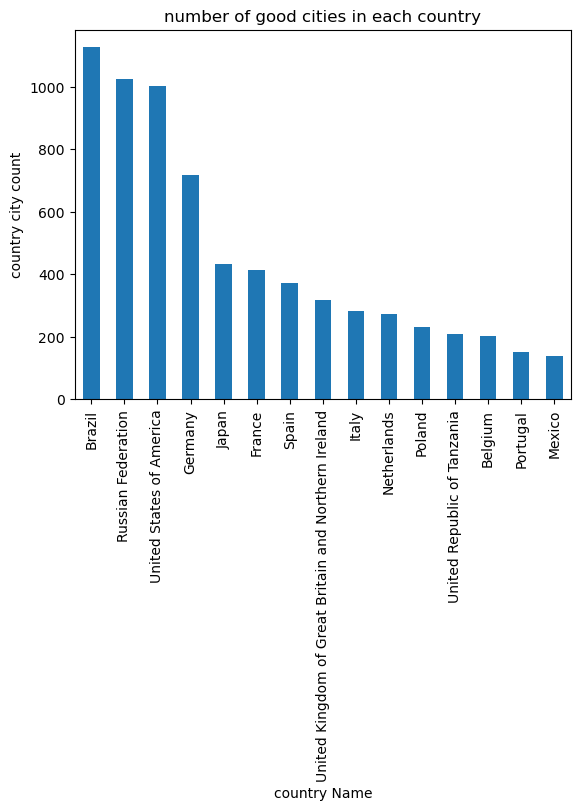

In [13]:
good_AQI_Country=global_air_pollution[global_air_pollution['AQI Category'] =='Good']
good=good_AQI_Country['Country'].value_counts().head(15)
good.plot(kind='bar')
plt.xlabel('country Name')
plt.ylabel('country city count')
plt.title('number of good cities in each country')
plt.show()

5. get the countrys name that have the most Hazardous cities

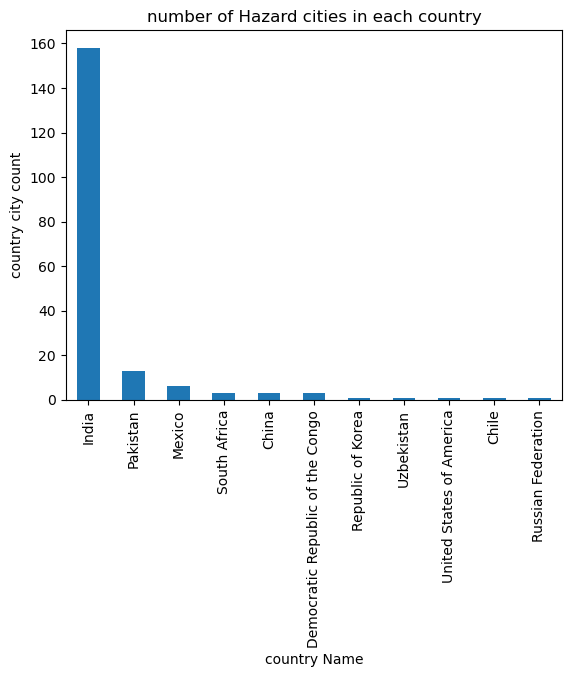

In [14]:
#gettint the most 15 Hazardous cities
Hazard_AQI_Country=global_air_pollution[global_air_pollution['AQI Category'] =='Hazardous']
Hazard= Hazard_AQI_Country['Country'].value_counts()
Hazard.plot(kind='bar')
plt.xlabel('country Name')
plt.ylabel('country city count')
plt.title('number of Hazard cities in each country')
plt.show()

### Distribution of Data

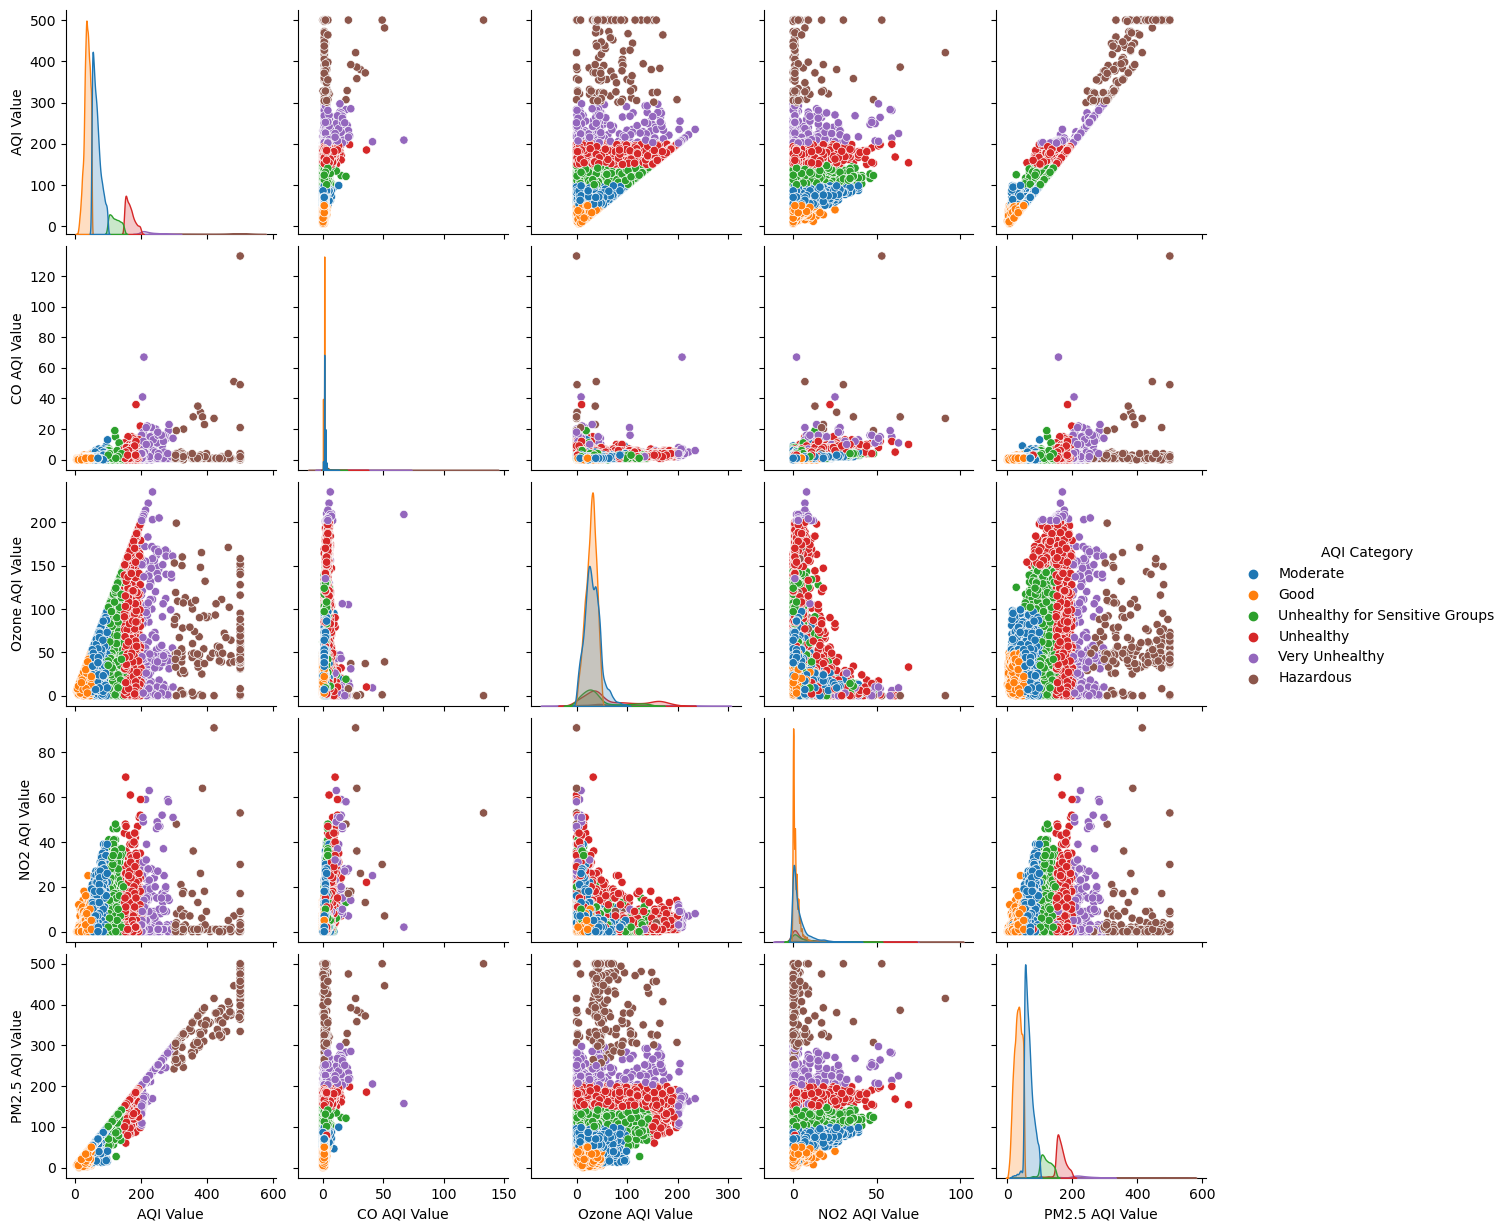

In [15]:
features=['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
sns.pairplot(global_air_pollution, hue='AQI Category', vars=features)
plt.show()

1. getting the correaltion between the numerical columns

In [16]:
correlation = global_air_pollution[features].corr()

In [17]:
correlation

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.430602,0.405310,0.231758,0.984327
CO AQI Value,0.430602,1.000000,0.145724,0.488092,0.438557
Ozone AQI Value,0.405310,0.145724,1.000000,-0.181818,0.339887
NO2 AQI Value,0.231758,0.488092,-0.181818,1.000000,0.260127
PM2.5 AQI Value,0.984327,0.438557,0.339887,0.260127,1.000000


2. heatmap of the correlation

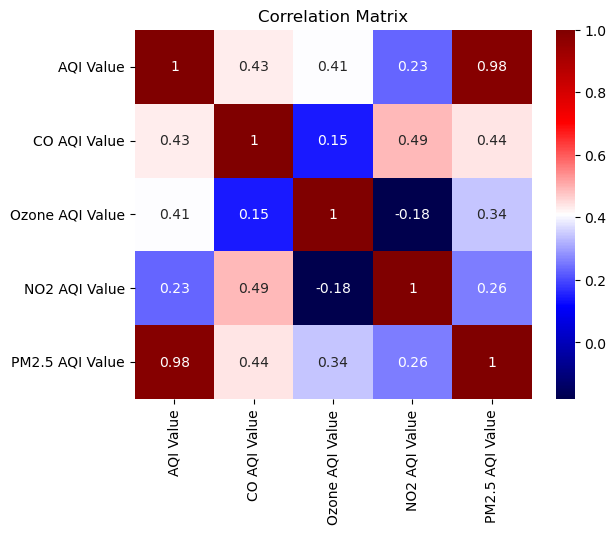

In [18]:
sns.heatmap(correlation, annot=True, cmap='seismic')
plt.title('Correlation Matrix')
plt.show()

3. the count of each feature value in the dataset

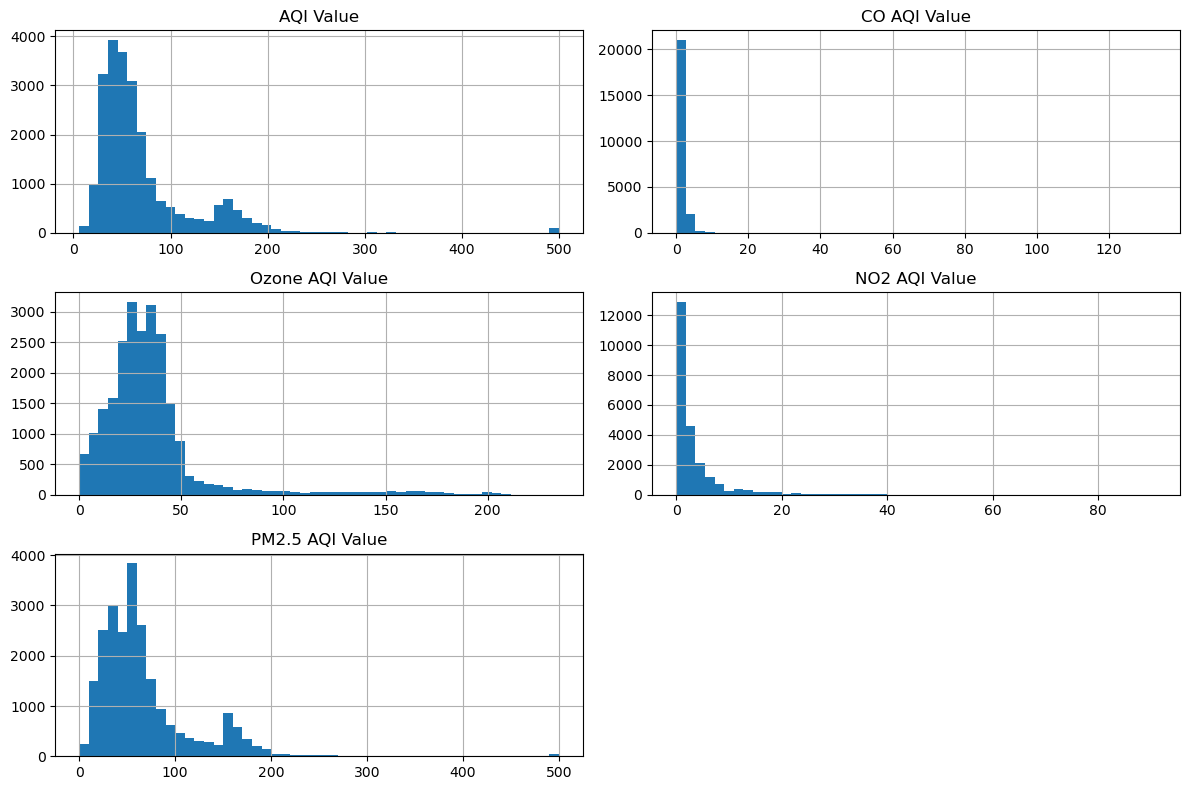

In [19]:
global_air_pollution[features].hist(bins=50, figsize=(12, 8), layout=(3,2))
plt.tight_layout()
plt.show()

4. some statistical info for the data

In [20]:
global_air_pollution[features].describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


# ML Models

### implemantation for some Machine Learning models
1. Random Forest Regressor
2. Random Forest Classifier
3. Naive Bayes (based on categories)

In [19]:
numerical_data = global_air_pollution[['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']]
categorical = global_air_pollution.drop(columns=['City','Country','AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value'])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
numerical_x = numerical_data.drop(columns=['AQI Value'])
numerical_y = numerical_data['AQI Value']

categorical_x = categorical.drop(columns=['AQI Category'])
categorical_y = categorical['AQI Category']

In [22]:
numerical_x_train,numerical_x_test,numerical_y_train,numerical_y_test = train_test_split(numerical_x,numerical_y,test_size=0.2,random_state=42)

In [23]:
categorical_x_train,categorical_x_test,categorical_y_train,categorical_y_test = train_test_split(categorical_x,categorical_y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rfr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('mod', RandomForestRegressor(n_estimators=3,max_depth=2))
])

In [27]:
rfr_model.fit(numerical_x_train,numerical_y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mod', RandomForestRegressor(max_depth=2, n_estimators=3))])

In [28]:
joblib.dump(rfr_model,'rfr_model_pipeline.pkl')
pred = rfr_model.predict(numerical_x_test)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error
print("The r2 score is "+str(r2_score(numerical_y_test,pred)))

The r2 score is 0.9039173017811898


In [30]:
joblib.dump(rfr_model, 'random_forest_reg.joblib')

['random_forest_reg.joblib']

### In order to get better result we will use GridSearchCv

In [31]:
rfr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('mod', RandomForestRegressor())
])
grid_param = {
    'mod__n_estimators':[5,10,100],
    'mod__max_depth':[None,5,7]
}
graid_search = GridSearchCV(rfr_model,grid_param,cv=5,scoring='r2',n_jobs=-1)
graid_search.fit(numerical_x_train,numerical_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mod', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'mod__max_depth': [None, 5, 7],
                         'mod__n_estimators': [5, 10, 100]},
             scoring='r2')

In [32]:
graid_search.best_score_

0.9980162169403007

In [33]:
graid_search.best_params_

{'mod__max_depth': None, 'mod__n_estimators': 10}

In [34]:
joblib.dump(graid_search.best_estimator_, 'grid_random_forest_reg.joblib')

['grid_random_forest_reg.joblib']

Random Forest Classifier

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [36]:
cat_rf = Pipeline([
    ('cat_ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    ('catnb', RandomForestClassifier(n_estimators=3,max_depth=2))
])

In [37]:
cat_rf.fit(categorical_x_train,categorical_y_train)

Pipeline(steps=[('cat_ohe',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('catnb', RandomForestClassifier(max_depth=2, n_estimators=3))])

In [38]:
joblib.dump(cat_rf,'rfc_model_pipeline.pkl')
pred = cat_rf.predict(categorical_x_test)

In [39]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(categorical_y_test,pred))

[[2014    0    0    0    0    0]
 [   0    0   42    0    0    0]
 [  42    0 1795    0    0    0]
 [   0    0    6  413    0    0]
 [   1    0   16    0  304    0]
 [   0    0   46   11    3    0]]


In [40]:
joblib.dump(cat_rf, 'categorical_random_forest.joblib')

['categorical_random_forest.joblib']

In [41]:
cat_rf = Pipeline([
    ('cat_ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    ('catnb', RandomForestClassifier())
])
grid_param = {
    'catnb__n_estimators':[5,10,100],
    'catnb__max_depth':[5,7]
}
graid_search = GridSearchCV(cat_rf,grid_param,cv=5,scoring='f1_weighted',n_jobs=-1)
graid_search.fit(categorical_x_train,categorical_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_ohe',
                                        OneHotEncoder(handle_unknown='ignore',
                                                      sparse_output=False)),
                                       ('catnb', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'catnb__max_depth': [5, 7],
                         'catnb__n_estimators': [5, 10, 100]},
             scoring='f1_weighted')

In [42]:
graid_search.best_score_

0.9992973254722888

In [43]:
graid_search.best_params_

{'catnb__max_depth': 7, 'catnb__n_estimators': 10}

In [44]:
best = graid_search.best_estimator_
pred=best.predict(categorical_x_test)

In [45]:
print(confusion_matrix(categorical_y_test,pred))

[[2014    0    0    0    0    0]
 [   0   36    0    0    0    6]
 [   0    0 1837    0    0    0]
 [   0    0    0  419    0    0]
 [   1    0    0    0  320    0]
 [   0    0    0    0    0   60]]


In [46]:
joblib.dump(graid_search.best_estimator_, 'grid_categorical_random_forest.joblib')

['grid_categorical_random_forest.joblib']

Naive Bayes

In [48]:
from sklearn.naive_bayes import CategoricalNB

CategoricalNB_mod = Pipeline([
    ('cat_ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    ('catnb', CategoricalNB())
])

CategoricalNB_mod.fit(categorical_x_train,categorical_y_train)
joblib.dump(CategoricalNB_mod,'cnb_model_pipeline.pkl')

['cnb_model_pipeline.pkl']

In [49]:
pred=CategoricalNB_mod.predict(categorical_x_test)

In [50]:
confusion_matrix(categorical_y_test,pred)

array([[2014,    0,    0,    0,    0,    0],
       [   0,   36,    0,    0,    0,    6],
       [   0,    0, 1837,    0,    0,    0],
       [   0,    0,    6,  413,    0,    0],
       [   0,    0,    0,    0,  320,    1],
       [   0,    0,    0,    0,    3,   57]], dtype=int64)

In [51]:
joblib.dump(CategoricalNB_mod, 'CategoricalNB.joblib')

['CategoricalNB.joblib']

## Neural Network

Epoch 1/50


C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


587/587 - 2s - 3ms/step - loss: 570.7030 - mae: 8.4348
Epoch 2/50
587/587 - 1s - 1ms/step - loss: 32.6898 - mae: 2.6486
Epoch 3/50
587/587 - 1s - 1ms/step - loss: 28.2579 - mae: 2.4178
Epoch 4/50
587/587 - 1s - 1ms/step - loss: 25.2039 - mae: 2.2349
Epoch 5/50
587/587 - 1s - 1ms/step - loss: 32.0435 - mae: 2.6661
Epoch 6/50
587/587 - 1s - 1ms/step - loss: 30.0950 - mae: 2.4555
Epoch 7/50
587/587 - 1s - 1ms/step - loss: 30.6197 - mae: 2.3627
Epoch 8/50
587/587 - 1s - 1ms/step - loss: 31.2534 - mae: 2.7314
Epoch 9/50
587/587 - 1s - 1ms/step - loss: 26.4387 - mae: 2.2393
Epoch 10/50
587/587 - 1s - 1ms/step - loss: 28.7489 - mae: 2.4263
Epoch 11/50
587/587 - 1s - 1ms/step - loss: 27.2386 - mae: 2.3755
Epoch 12/50
587/587 - 1s - 1ms/step - loss: 26.2314 - mae: 2.3755
Epoch 13/50
587/587 - 1s - 1ms/step - loss: 24.1542 - mae: 2.0635
Epoch 14/50
587/587 - 1s - 1ms/step - loss: 26.4031 - mae: 2.2578
Epoch 15/50
587/587 - 1s - 1ms/step - loss: 30.9254 - mae: 2.5148
Epoch 16/50
587/587 - 1s - 1m

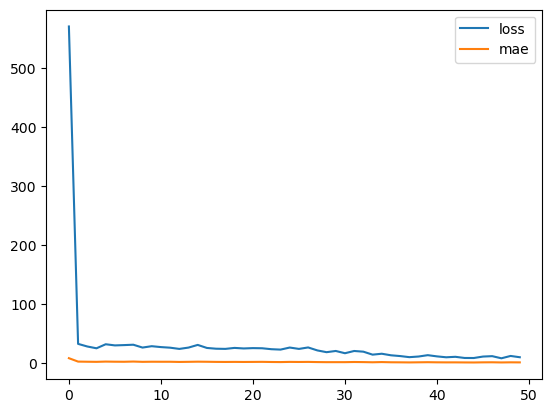

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 6.9293 - mae: 0.4506


Test MAE: 0.43949902057647705


In [53]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model

scaler = StandardScaler(); 
X_train = scaler.fit_transform(numerical_x_train); 
X_test = scaler.transform(numerical_x_test)
joblib.dump(scaler,'nural_scaler.pkl')
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=(4,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mse',
    metrics=['mae']
)

hist = model.fit(X_train,numerical_y_train,epochs=50,verbose=2)
pd.DataFrame(hist.history).plot(); 
plt.show()
print('Test MAE:', model.evaluate(X_test,numerical_y_test)[1])

model.save("neural.h5")

# Clustering

Here we should drop the nulls to cluster the citys 

In [49]:
clean_global_air_pollution = global_air_pollution.drop(columns=['City','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'])
clean_global_air_pollution.dropna(inplace=True)
clean_global_air_pollution.drop_duplicates(inplace=True)

In [50]:
grouped_global_air_pollution = clean_global_air_pollution.groupby('Country').mean().reset_index()

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [52]:
data = grouped_global_air_pollution.drop(columns=['Country'])
scaler = MinMaxScaler()
kmean= KMeans(n_clusters=6)

In [55]:
data = scaler.fit_transform(data)

In [56]:
kmean.fit_predict(data)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 4, 4, 1, 5, 1, 1, 3, 1, 1, 1, 2, 4, 5, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 5, 1, 5, 5, 5, 2, 5, 1, 5, 5, 4, 5, 4, 1, 1, 3,
       1, 5, 1, 4, 5, 1, 5, 1, 5, 1, 1, 5, 3, 1, 1, 5, 4, 5, 5, 3, 1, 5,
       5, 4, 1, 3, 4, 4, 4, 1, 4, 4, 5, 1, 4, 1, 5, 3, 2, 4, 1, 1, 4, 5,
       1, 4, 1, 1, 1, 1, 4, 1, 5, 1, 3, 1, 5, 4, 1, 1, 1, 1, 1, 5, 4, 1,
       1, 1, 5, 5, 1, 2, 2, 1, 5, 1, 1, 1, 5, 1, 1, 2, 0, 1, 4, 1, 1, 5,
       5, 5, 2, 3, 4, 1, 1, 5, 4, 4, 1, 5, 3, 5, 1, 5, 4, 5, 1, 1, 1, 4,
       4, 1, 5, 5, 4, 1, 4, 5, 1, 2, 1, 1, 5, 1, 4, 1, 5, 4, 3, 1, 1])

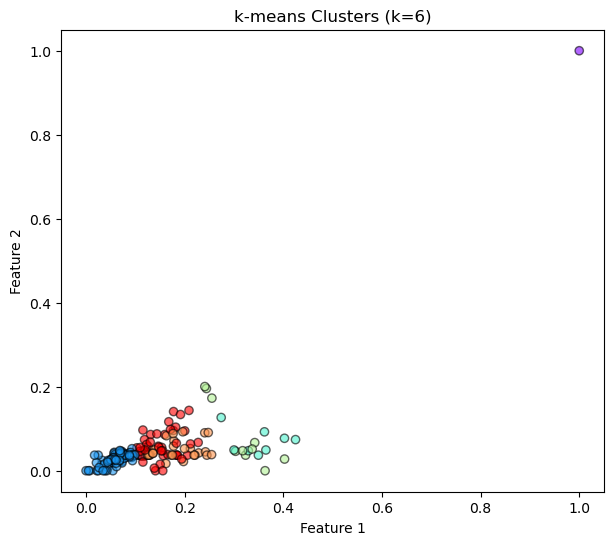

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

labels1 = kmean.labels_
centers = kmean.cluster_centers_

plt.figure(figsize=(7, 6))
plt.scatter(data[:, 0], data[:,1], c=labels1, cmap='rainbow', alpha=0.6, edgecolor='k')
plt.title("k-means Clusters (k=6)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend
plt.show()

In [68]:
score1 = silhouette_score(data, labels1)
print(score1)

0.36663735236908945


In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=41)
data_pca = pca.fit_transform(data)

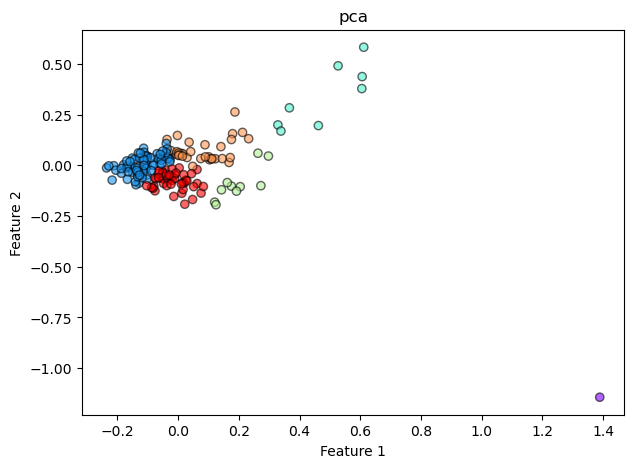

In [67]:
%matplotlib inline


plt.figure(figsize=(7, 5))
plt.scatter(data_pca[:, 0], data_pca[:,1], c=labels1, cmap='rainbow', alpha=0.6, edgecolor='k')
plt.title("pca")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend
plt.show()